In [1]:
# Ramon Ulloa
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

Accuracy Score: 
0.9768293270388747

Area Under Curve: 
0.9888227217915413


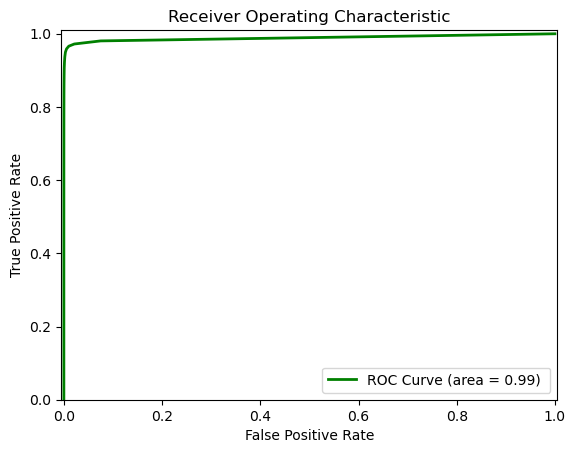

In [2]:
#Instantiating RandomForestClassifier object
ccfd_randomforest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 7)

#Training the model
ccfd_randomforest.fit(X_train_balanced,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
randomforest_prediction = ccfd_randomforest.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_rf = metrics.accuracy_score(y_test_balanced, randomforest_prediction)

#Displaying final accuracy score
print("Accuracy Score: ")
print(score_rf)
print()

#Estimating the probability of Credit Card Fraud Label
randomforest_prediction_probability = ccfd_randomforest.predict_proba(X_test_balanced)

#Calculating true positive rate(tpr) and false positive rate(fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test_balanced, randomforest_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
AUC = metrics.auc(fpr, tpr)
print("Area Under Curve: ")
print(AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC Curve (area = %0.2f) ' % AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');